# Burgers equation

Jupyter notebook to illustrate the solution of the Burgers equation.

Philipp Schlatter, January 2022

---

## Perliminaries

Initialisation of the libraries and graphics:

In [105]:
%matplotlib notebook 
# possible options: notebook, inline or widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.animation
from math import pi
params = {'legend.fontsize': 12,
          'legend.loc':'best',
          'figure.figsize': (8,5),
          'lines.markerfacecolor':'none',
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'xtick.labelsize':12,
          'ytick.labelsize':12,
          'grid.alpha':0.6}
pylab.rcParams.update(params)

Define grid and initial condition

In [141]:
L=10
T=2
nx=201
nt=51
dx=L/(nx-1)    
dt=T/(nt-1)
x=np.linspace(0,L,num=nx,endpoint=True)
t=np.linspace(0,T,num=nt,endpoint=True)

u0=np.zeros(nx)

# triangle
for i in range(nx):
    if x[i]>=3 and x[i]<5:
        u0[i]=(x[i]-3)/2
    if x[i]>=5 and x[i]<=7:
        u0[i]=(-x[i]+7)/2
        
# sine wave        
#u0 = np.sin(x*2*pi/10)

<IPython.core.display.Javascript object>


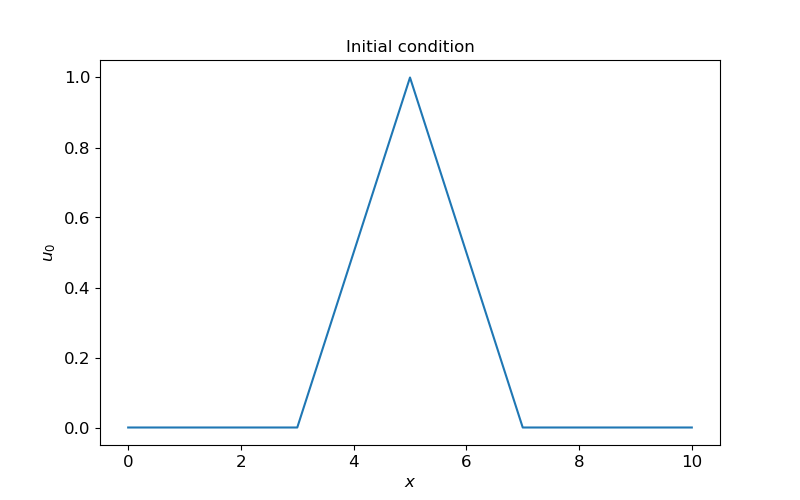

In [142]:
plt.figure()
plt.plot(x,u0)
plt.xlabel(r'$x$')
plt.ylabel(r'$u_0$')
plt.title('Initial condition')
plt.show()

Preallocate all necessary array variables:

In [143]:
u_fs = np.zeros( (nx,nt) )
fp = np.zeros(nx)
fm = np.zeros(nx)
u_fs[:,0] = u0

Time integration with flux splitting upwind scheme:

In [144]:
j0=range(1,nx-1)
jm=[x-1 for x in j0]
jp=[x+1 for x in j0]

for i in range(nt-1):
    fp[j0] = 0.5*(u_fs[j0,i]+abs(u_fs[j0,i]))*u_fs[j0,i]*0.5
    fm[j0] = 0.5*(u_fs[j0,i]-abs(u_fs[j0,i]))*u_fs[j0,i]*0.5
    f_fs_1  = fp[jm]+fm[j0]
    f_fs_2  = fp[j0]+fm[jp]
    u_fs[j0,i+1] = u_fs[j0,i] - dt/dx*(f_fs_2-f_fs_1)

Animated plotting:

<IPython.core.display.Javascript object>


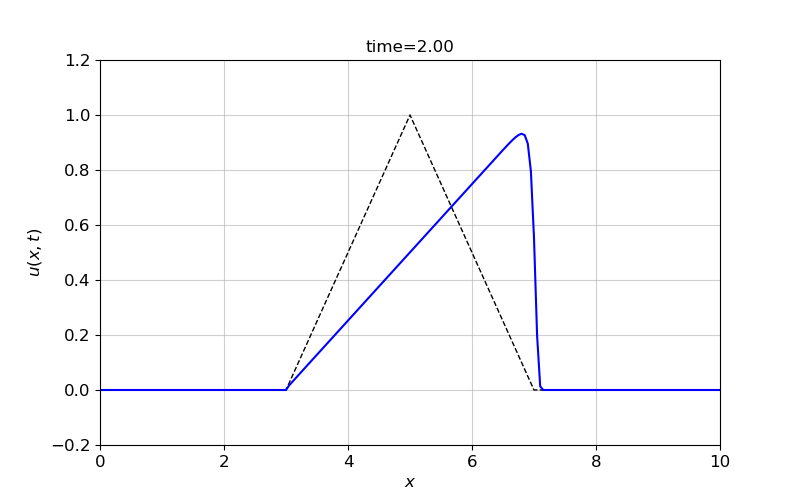

In [146]:
#plt.rcParams["animation.html"] = "jshtml"
#plt.ion()
scale = 1

fig = plt.figure(figsize=(8,5))

def animate(j):
    plt.cla()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$u(x,t)$')
    plt.grid()
    plt.plot(x,u0,'k--',lw=1,label='initial')
    plt.plot(x,u_fs[:,scale*j],'b',label='flux splitting')
    plt.xlim(0,L)
    plt.ylim(-0.2,1.2)
    plt.title(f"time={t[scale*j]:.2f}")  
    
ani=matplotlib.animation.FuncAnimation(fig, animate, frames=int((nt-1)/scale+1), repeat=False,interval=1)
#writer = matplotlib.animation.writers['ffmpeg']
#writer = writer(fps=24)
#ani.save('out.mp4', writer=writer)

We can now also show our solution as a so-called _space-time diagram_, where we can see the complete solution $u(x,t)$.

<IPython.core.display.Javascript object>


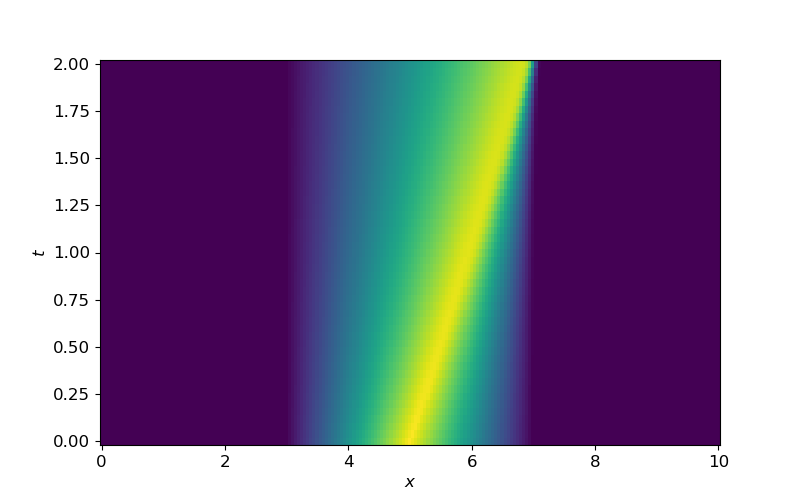

In [147]:
plt.figure()
plt.pcolor(x,t,u_fs.T,shading='nearest')
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.show()